It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help you better prepare your data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.

### How to calculate a covariance matrix to summarize the linear relationship between two or more variables ?

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
Negative Correlation: variables change in opposite directions.

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


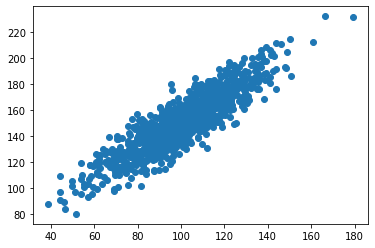

In [4]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

## cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

In [7]:
from numpy import cov
# seed random number generator
seed(1)

# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


data1: mean=7.800 stdv=3.250
data2: mean=15.000 stdv=4.669


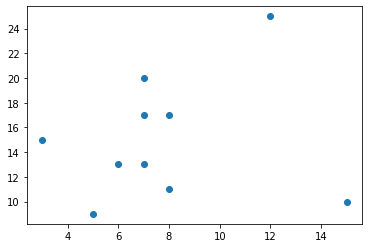

In [6]:
p_s = [15,12,8,8,7,7,7,6,5,3]
h_s = [10,25,17,11,13,17,20,13,9,15]
print('data1: mean=%.3f stdv=%.3f' % (mean(p_s), std(p_s)))
print('data2: mean=%.3f stdv=%.3f' % (mean(h_s), std(h_s)))
pyplot.scatter(p_s,h_s)


In [9]:
from numpy import cov
covariance = cov(p_s,h_s)
print(covariance)

[[11.73333333  2.44444444]
 [ 2.44444444 24.22222222]]


Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

In [50]:
from scipy.stats import pearsonr
corr, _ = pearsonr(p_s, h_s)
print(corr)
print(_)

0.1449981545806852
0.6894014481166955


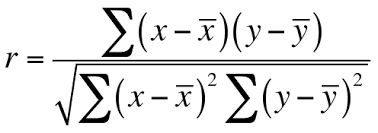

In [87]:
from IPython.display import Image
from IPython.core.display import HTML 
#Image(url= "http://my_site.com/my_picture.jpg")
#PATH = "/Users/reblochonMasque/Documents/Drawings/"
Image(filename = "download.png",  width=500, unconfined=True)

In [89]:
import math
p_s = [15,12,8,8,7,7,7,6,5,3]
h_s = [10,25,17,11,13,17,20,13,9,15]
p_s_mean = sum(p_s)/len(p_s)
h_s_mean = sum(h_s)/len(p_s)

p_s_std = math.sqrt(sum([(val -p_s_mean)**2 for val in p_s]))
h_s_std = math.sqrt(sum([(val -h_s_mean)**2 for val in h_s]))

p_s_norm = [val- p_s_mean for val in p_s]
h_s_norm = [val- h_s_mean for val in h_s]

numerator = sum([x*y for x,y in zip(p_s_norm,h_s_norm )])
denominator = p_s_std*h_s_std
corr = numerator/denominator
print(round(corr,3))
correlation, _ = pearsonr(p_s, h_s)
print('Using function',correlation)


0.145
Using function 0.1449981545806852


#### Using random data

In [91]:
import math
def pearsons_corr(X,Y):
    X_mean = sum(X)/len(X)
    Y_mean = sum(Y)/len(Y)
    X_norm = [val -  X_mean for val in X]
    Y_norm = [val - Y_mean for val in Y]
    X_std = math.sqrt(sum([(val -  X_mean)**2 for val in X]))
    Y_std = math.sqrt(sum([(val -  Y_mean)**2 for val in Y]))
    numerator = sum([x*y for x,y in zip(X_norm,Y_norm)])
    denominator = X_std*Y_std 
    return round(numerator/denominator,3)
pearsons_corr(p_s,h_s )
pearsons_corr(data1,data2 )

0.888